In [15]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

import torchvision.datasets # cкачивание MNIST
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data # изображения для тренировки
y_train = MNIST_train.train_labels # желаемые результаты после тренировки
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

X_train = X_train.float() # переход к дробным величинам
X_test = X_test.float()

import matplotlib.pyplot as plt

X_train = X_train.reshape([-1, 28 * 28]) # переход от двухмерного тензора (28х28) к одномерному (784)
X_test = X_test.reshape([-1, 28 * 28])

class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons) # внутренний слой
        self.ac1 = torch.nn.ReLU() # активация внутреннего слоя
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons) # второй слой
        self.ac2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons,10)
    
    def forward(self, x): # прогонка изображения (тензора) через сеть
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        return x
    
mnist_net = MNISTNet(100) # создание сети со 100 скрытыми нейронами

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # запуск на видеокарте
mnist_net = mnist_net.to(device)

loss = torch.nn.CrossEntropyLoss() # функция ошибки
optimizer = torch.optim.SGD(mnist_net.parameters(), lr=1.0e-3, momentum=0.9) # оптимизатор (градиентный спуск)

batch_size = 100

test_accuracy_history = [] # запись точности тестов
test_loss_history = [] # запись потерей при тестах

X_test = X_test.to(device)
y_test = y_test.to(device)

import time
start_time = time.time()

for epoch in range(100): # в скобках задается количество эпох
    order = np.random.permutation(len(X_train)) # перемешивание индексов изображений
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad() # обнуление градиента
        
        batch_indexes = order[start_index:start_index+batch_size] # сто индексов
        
        X_batch = X_train[batch_indexes].to(device) # берется сто изображений
        y_batch = y_train[batch_indexes].to(device) # берется сто ответов
        
        preds = mnist_net.forward(X_batch) # предсказание сети на сто изображений
        
        loss_value = loss(preds, y_batch) # размер ошибки
        loss_value.backward() # считаем градиент
        
        optimizer.step() # градиентный шаг

    test_preds = mnist_net.forward(X_test) # прогонка тестового множества
    test_loss_history.append(loss(test_preds, y_test).data.cpu()) # значение функции ошибки добавляется
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu() # доля правильных ответов
    test_accuracy_history.append(accuracy)
    print(accuracy)

print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor(0.9420)
tensor(0.9518)
tensor(0.9589)
tensor(0.9589)
tensor(0.9626)
tensor(0.9643)
tensor(0.9639)
tensor(0.9638)
tensor(0.9647)
tensor(0.9633)
tensor(0.9642)
tensor(0.9654)
tensor(0.9649)
tensor(0.9696)
tensor(0.9674)
tensor(0.9685)
tensor(0.9693)
tensor(0.9677)
tensor(0.9671)
tensor(0.9690)
tensor(0.9672)
tensor(0.9654)
tensor(0.9689)
tensor(0.9684)
tensor(0.9674)
tensor(0.9716)
tensor(0.9696)
tensor(0.9707)
tensor(0.9692)
tensor(0.9697)
tensor(0.9722)
tensor(0.9716)
tensor(0.9713)
tensor(0.9718)
tensor(0.9717)
tensor(0.9712)
tensor(0.9711)
tensor(0.9726)
tensor(0.9716)
tensor(0.9720)
tensor(0.9718)
tensor(0.9720)
tensor(0.9724)
tensor(0.9719)
tensor(0.9721)
tensor(0.9718)
tensor(0.9719)
tensor(0.9723)
tensor(0.9720)
tensor(0.9725)
tensor(0.9725)
tensor(0.9720)
tensor(0.9723)
tensor(0.9726)
tensor(0.9723)
tensor(0.9723)
tensor(0.9726)
tensor(0.9724)
tensor(0.9728)
tensor(0.9724)
tensor(0.9724)
tensor(0.9724)
tensor(0.9725)
tensor(0.9728)
tensor(0.9727)
tensor(0.9727)
tensor(0.9

In [16]:
print(sum(test_accuracy_history)/100)

tensor(0.9702)


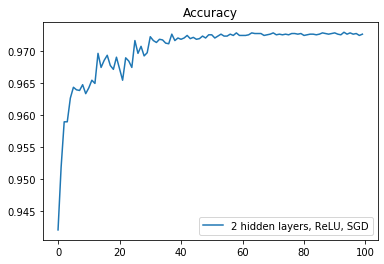

In [19]:
plt.plot(test_accuracy_history, label='2 hidden layers, ReLU, SGD')
plt.legend()
plt.title('Accuracy'); # вывод точности на график

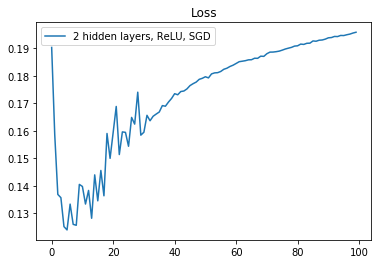

In [20]:
plt.plot(test_loss_history, label='2 hidden layers, ReLU, SGD')
plt.legend()
plt.title('Loss'); # вывод потерь на график